In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv('customer_data_records.csv')
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,117,20
1,2,107,59
2,3,29,36
3,4,121,19
4,5,86,90


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              174 non-null    int64
 1   Annual Income (k$)      174 non-null    int64
 2   Spending Score (1-100)  174 non-null    int64
dtypes: int64(3)
memory usage: 4.2 KB


In [21]:
df.duplicated().sum()

np.int64(0)

In [25]:
#Extract relevant features(column headers) for clustering
X = df.iloc[:, [1, 2]].values #select columns 1 and 2 as annual income and spending score for all rows

In [26]:
#Future Scalng - important to scale features before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #standarize the features to have mean=0 and variance=1 

In [ ]:
#Determine the optimal number of clusters from 1 to 10 using the Elbow method
wcss = []
for i in range(1, 11): # we use 11 so as 10 is inclusive 
    kmeans = cluster.KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

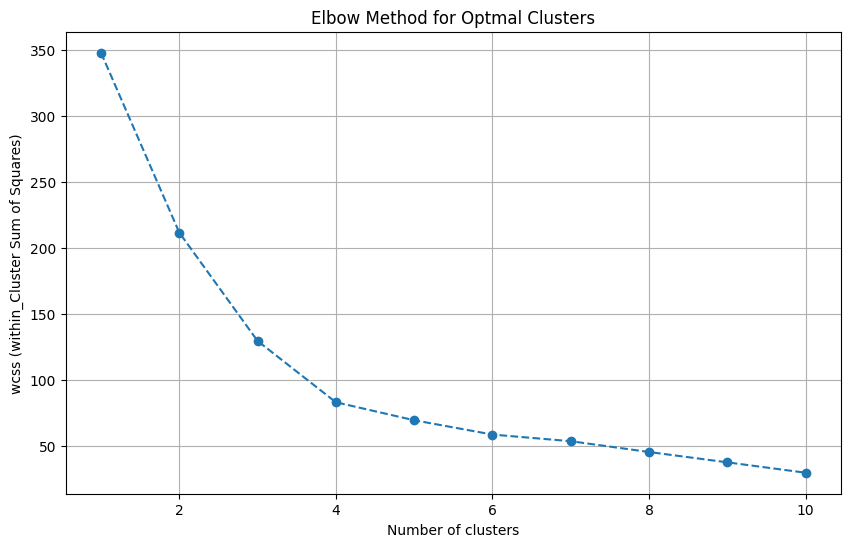

In [28]:
#Plot Elbow metd graph

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optmal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('wcss (within_Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [29]:
#Based on Elbow graph lets assume the optimal number is 5
optimal_clusters = 5

kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42) 
kmeans.fit(X_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [32]:
#Apply the k-means wth the optimal number of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [33]:
#Add custer labels to the original data 
# Add new column cluster

df['Clusters'] = y_kmeans

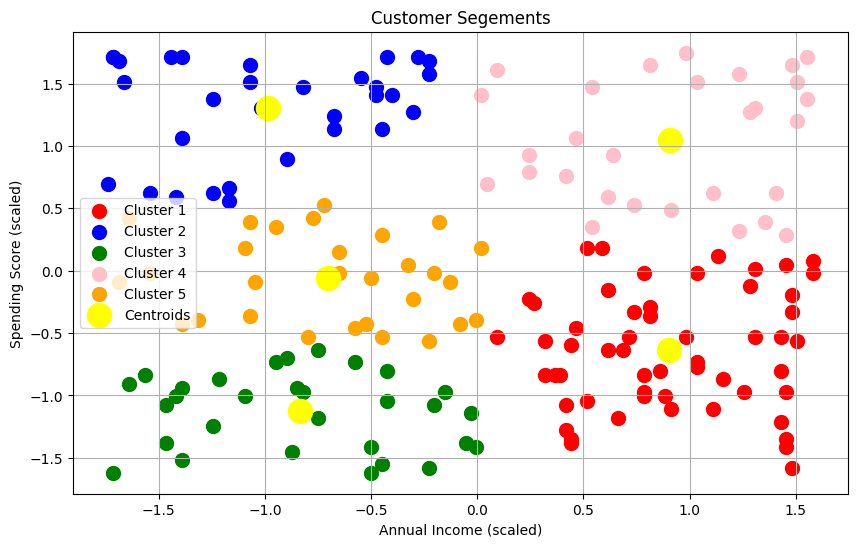

In [40]:
#Visualize the clusters

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='pink', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segements')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10412\56793183.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_scaled[y_kmeans == cluster, 0],


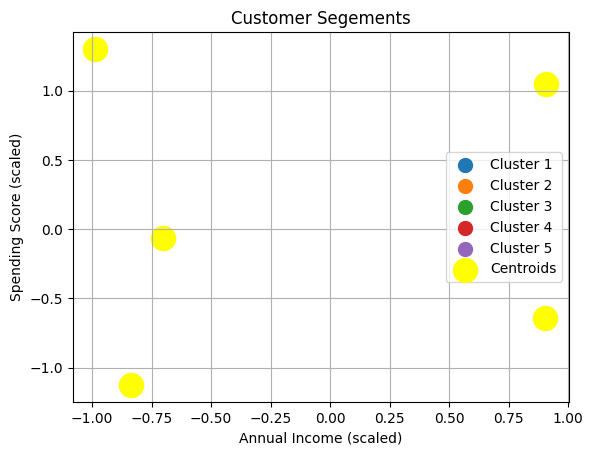

In [44]:
#Plot each cluster with different colors
for i in range(optimal_clusters):
    plt.scatter(X_scaled[y_kmeans == cluster, 0],
                X_scaled[y_kmeans == cluster, 1],
                s=100, c=plt.cm.tab10(i), label=f'Cluster {i+1}') # Use tab10 colormap for dstinct colors
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segements')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()  